In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def draw_hist(x_vals, 
              n_bins, 
              rng=None, 
              density=False,
              x_fit=None, 
              fit_func=None,
              fit_params={},
              fit_scale=False,
              errs=False, 
              fit_info=None,
              ax=None, 
              fit_color='red', 
              hist_color='black',
              hist_alpha=1,
              fit_label='Fitted curve',
              hist_label='Histogram',
              x_label='Value',
              legend=True,
              leg_loc='best',
              leg_ncol=1,
              **kwargs):
    '''Draws a histogram

    Args:
        x_vals (array): Values to be binned
        n_bins (int): Number of bins
        rng (tuple): Minimum and maximum x value
        x_fit (array): Array of fitted x values
        fit_func (array): Fitting function
        fit_params (dict): Fitting parameters
        errs (bool): Errorbars on histogram
        fit_info (list): List of fit info for chart legend
        ax (matplotlib.axis): Axis object

    Returns:
        matplotlib axis object

    TODO:
        scaling factor N?
    '''
    plot = False
    if ax is None:
        plot = True
        fig, ax = plt.subplots(figsize=(10, 5))

    # histogram
    n_hist, x_loc, _ = ax.hist(x_vals, bins=n_bins, range=rng, density=density, label=hist_label, color=hist_color, histtype='step', alpha=hist_alpha)

    print(np.sum(n_hist))

    # normalize with N_points * binwidth
    # binwidth = (xmax - xmin) / n_bins
    binwidth = np.abs(np.max(x_loc) - np.min(x_loc[0]))/n_bins
    #binwidth = np.abs(x_loc[1] - x_loc[0])
    n_points = len(x_vals)
    N = n_points * binwidth
    x_loc = (x_loc + binwidth/2)[:-1]

    # plot scatter and error bars
    if errs:
        ax.errorbar(x_loc, n_hist, yerr=np.sqrt(n_hist), ls='None', capsize=3, color=hist_color)

    # curve
    if fit_func is not None:
        if x_fit is None:
            x_fit = np.linspace(x_loc[0], x_loc[-1], 1000)

        ax.plot(x_fit, (fit_scale * N + 1 - fit_scale) * fit_func(x_fit, **fit_params), label=fit_label, color=fit_color)

    if density:
        ylabel = 'Density'
    else:
        ylabel = 'Frequency'

    ax.set(xlabel=x_label, ylabel=ylabel + " / " + str(np.around(binwidth, 4)), **kwargs)

    if legend:
        leg_title = ''
        if fit_info is not None:
            leg_title = "\n".join(fit_info)
        ax.legend(title=leg_title, loc=leg_loc, ncol=leg_ncol)

    if plot == False:
        return ax
    else:
        plt.show()

In [3]:
df_fc = pd.read_csv('analysis/ds_comparison/14246832_2022110313584614/r2_fc.csv', index_col=0, names=['FluxCom'], skiprows=1)
df_fs = pd.read_csv('analysis/ds_comparison/14246832_2022110313584614/r2_fs.csv', index_col=0, names=['FluxSat'], skiprows=1)
df = pd.concat([df_fc, df_fs], axis=1)
df = df[df.notna().all(axis=1)]
df

,FluxCom,FluxSat
301,0.515373,0.892985
599,0.963833,0.930835
719,0.967670,0.195853
802,0.520636,0.341404
1013,0.953055,0.978642
...,...,...
9357,0.337176,0.554439
9701,0.141148,-0.033041
9771,-2.253499,0.944950
9800,0.928419,0.881432


In [4]:
statistic, p_value = stats.ranksums(df['FluxSat'], df['FluxCom'])
print("Test statistic:", statistic)
print("p-value:", p_value)

Test statistic: 58.38726891890465
p-value: 0.0


In [5]:
print('FluxSat:', (df[df.FluxSat > .8].sum()/len(df))['FluxSat'])
print('FluxCom:', (df[df.FluxCom > .8].sum()/len(df))['FluxCom'])

FluxSat: 0.5117530779598146
FluxCom: 0.1747249022842452


79.99999999999999
80.0


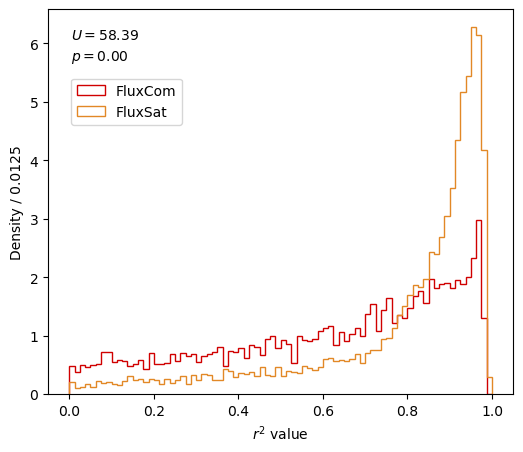

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))
bins = 80
rng = (0, 1)
draw_hist(df['FluxCom'], bins, ax=ax, density=True, fit_scale=True, rng=rng, hist_label='FluxCom', hist_color='#D00000')
draw_hist(df['FluxSat'], bins, ax=ax, density=True, fit_scale=True, rng=rng, hist_label='FluxSat', hist_color='#E28826')

ax.text(0.05, 0.95, r'$U=%.2f$' % (statistic, ), transform=ax.transAxes, fontsize=10, verticalalignment='top')
ax.text(0.05, 0.9, r'$p=%.2f$' % (p_value, ), transform=ax.transAxes, fontsize=10, verticalalignment='top')

plt.xlabel('$r^2$ value')
plt.legend(loc=(0.05, 0.7))

plt.savefig('analysis/ds_comparison/14246832_2022110313584614/hist.pdf')

In [ ]:
# combine in panel with LC values

fig, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [2, 1]})

# fig 1
lc_errs = pd.read_csv('analysis/lc_errs.csv')

bins = 80
rng = (0, .04)
draw_hist(lc_errs.loc[lc_errs.key == 'CRO', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='CRO', hist_color='#D00000')
draw_hist(lc_errs.loc[lc_errs.key == 'SH', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='SH', hist_color='#E28826')
draw_hist(lc_errs.loc[lc_errs.key == 'MF', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='MF', hist_color='#D5E002')
draw_hist(lc_errs.loc[lc_errs.key == 'DBF', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='DBF', hist_color='#8FE388')
draw_hist(lc_errs.loc[lc_errs.key == 'EBF', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='EBF', hist_color='#1B998B')
draw_hist(lc_errs.loc[lc_errs.key == 'ENF', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='ENF', hist_color='#00CDC8')
draw_hist(lc_errs.loc[lc_errs.key == 'WET', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='WET', hist_color='#3185FC')
draw_hist(lc_errs.loc[lc_errs.key == 'GRA', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='GRA', hist_color='#9B68CE')
draw_hist(lc_errs.loc[lc_errs.key == 'SAV', 'value'], bins, ax=axs[0], density=True, fit_scale=True, rng=rng, hist_label='SAV', hist_color='#FF9B85', x_label='Relative Standard Error', leg_loc=4, leg_ncol=2)

ax_inset = axs[0].inset_axes([0.5, 0.6, 0.5, 0.4])
keys = ['CRO', 'SH', 'MF', 'DBF', 'EBF', 'ENF', 'WET', 'GRA', 'SAV']
colors = ['#D00000', '#E28826', '#D5E002', '#8FE388', '#1B998B', '#00CDC8', '#3185FC', '#9B68CE', '#FF9B85']
data = [lc_errs.loc[lc_errs.key == x, 'value'] for x in keys]
boxplot = ax_inset.boxplot(data, patch_artist=True, labels=keys, showfliers=False, medianprops={'color': 'black'})

for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax_inset.set_ylabel('Relat. SEM')

axs[0].text(-0.1, -0.1, '(a)', transform=axs[0].transAxes, size=12, weight='bold')

# fig 2
bins = 80
rng = (0, 1)
draw_hist(df['FluxCom'], bins, ax=axs[1], density=True, fit_scale=True, rng=rng, hist_label='FluxCom', hist_color='#D00000')
draw_hist(df['FluxSat'], bins, ax=axs[1], density=True, fit_scale=True, rng=rng, hist_label='FluxSat', hist_color='#E28826')

axs[1].text(0.05, 0.95, r'$U=%.2f$' % (statistic, ), transform=axs[1].transAxes, fontsize=10, verticalalignment='top')
axs[1].text(0.05, 0.9, r'$p=%.2f$' % (p_value, ), transform=axs[1].transAxes, fontsize=10, verticalalignment='top')

axs[1].set_xlabel('$r^2$ value')
axs[1].legend(loc=(0.05, 0.7))
axs[1].text(-0.1, -0.1, '(b)', transform=axs[1].transAxes, size=12, weight='bold')

plt.tight_layout()
plt.savefig('analysis/hist_panel.pdf')